In [1]:
import pandas as pd
import numpy as np

import sklearn
import sklearn.model_selection as ms
import sklearn.metrics as mx

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import imblearn.over_sampling as imbos

import matplotlib.pyplot as plt
import seaborn as sns

import ModelFunctions

%matplotlib inline

# Support Vector Classifier

In [2]:
model_data, X, y = ModelFunctions.import_model_data('/Users/christineegan/AppleM1SentimentAnalysis/data/combined_data/model_data/2021_02_01_ModelData.csv')


[*] Importing model data...

[*] Identifying target...


### Grid Search

In [3]:
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3) 
  
grid.fit(X, y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  32.5s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  30.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  31.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  30.5s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=  31.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  28.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  26.8s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  30.2s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  28.9s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  30.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  34.5s
[CV 2/5] END ..................C=0.1, gamma=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [6]:
params = grid.best_params_
params['probability'] = True

print('Best Parameters: \n', params)

clfs = [SVC(**params)]
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Best Parameters: 
 {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}


### Model Results (without SMOTE)


[*] Running basic model...

[*] Generating basic model with TTS for: SVC(C=1, gamma=1, probability=True)
-- Test Size:  0.2

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99       293
         1.0       0.99      1.00      1.00       997

    accuracy                           0.99      1290
   macro avg       1.00      0.99      0.99      1290
weighted avg       0.99      0.99      0.99      1290




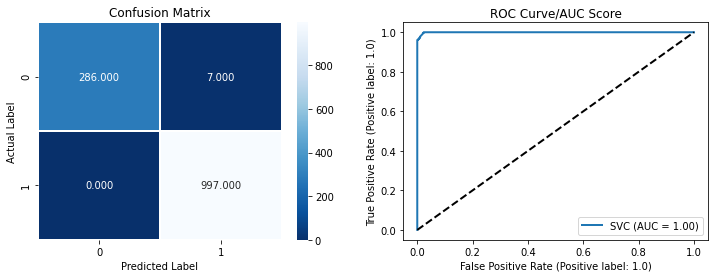



[*] Running basic model...

[*] Generating basic model with TTS for: SVC(C=1, gamma=1, probability=True)
-- Test Size:  0.3

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       1.00      0.97      0.99       448
         1.0       0.99      1.00      1.00      1487

    accuracy                           0.99      1935
   macro avg       1.00      0.99      0.99      1935
weighted avg       0.99      0.99      0.99      1935




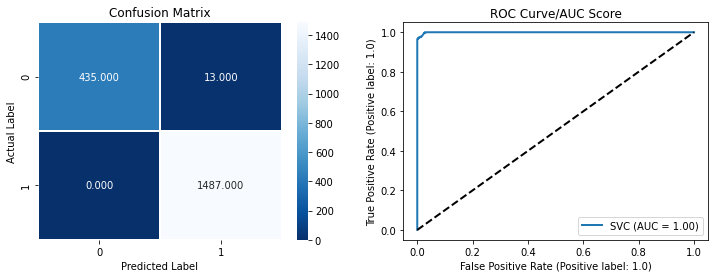



[*] Running basic model...

[*] Generating basic model with TTS for: SVC(C=1, gamma=1, probability=True)
-- Test Size:  0.4

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       1.00      0.97      0.98       593
         1.0       0.99      1.00      1.00      1987

    accuracy                           0.99      2580
   macro avg       1.00      0.98      0.99      2580
weighted avg       0.99      0.99      0.99      2580




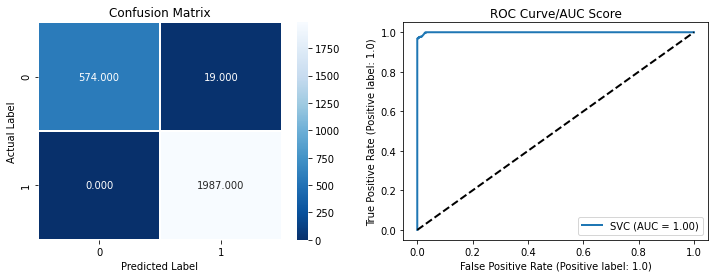



[*] Running cross-val model...


,Accuracy,AUC,Precision,Recall,F1
0,0.989147,0.999304,0.985972,1.0,0.992936
1,0.989922,0.999309,0.986961,1.0,0.993438
2,0.991473,0.999364,0.988945,1.0,0.994442
3,0.992248,0.999470,0.989940,1.0,0.994944
4,0.993798,0.999457,0.991927,1.0,0.995947
mean,0.991318,0.999381,0.988749,1.0,0.994341



[*] Plotting ROC curve...


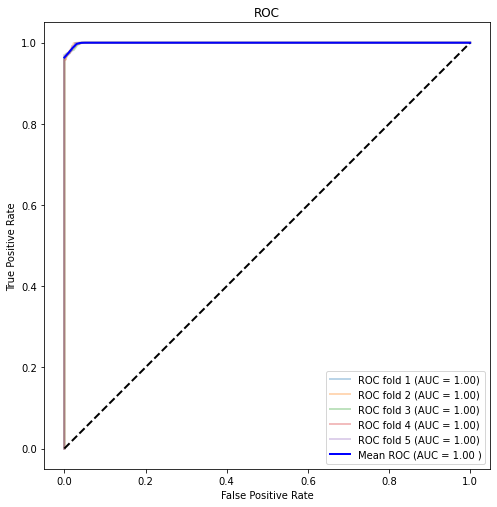


[*] Calculating model scores...


,Model 1
Accuracy,0.991318
AUC,0.999381
Precision,0.988749
Recall,1.000000
F1,0.994341


In [7]:
model_scores = ModelFunctions.model_results(clfs, X, y, cv)

### Model Results (with SMOTE)


[*] Running basic model...

[*] Generating basic model with TTS for: SVC(C=1, gamma=1, probability=True)
-- Test Size:  0.2

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99       293
         1.0       0.99      1.00      1.00       997

    accuracy                           0.99      1290
   macro avg       1.00      0.99      0.99      1290
weighted avg       0.99      0.99      0.99      1290




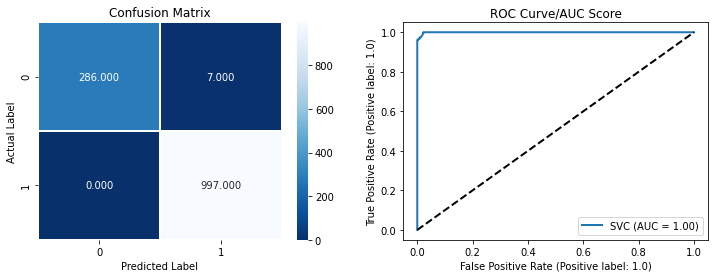



[*] Running basic model...

[*] Generating basic model with TTS for: SVC(C=1, gamma=1, probability=True)
-- Test Size:  0.3

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       1.00      0.97      0.99       448
         1.0       0.99      1.00      1.00      1487

    accuracy                           0.99      1935
   macro avg       1.00      0.99      0.99      1935
weighted avg       0.99      0.99      0.99      1935




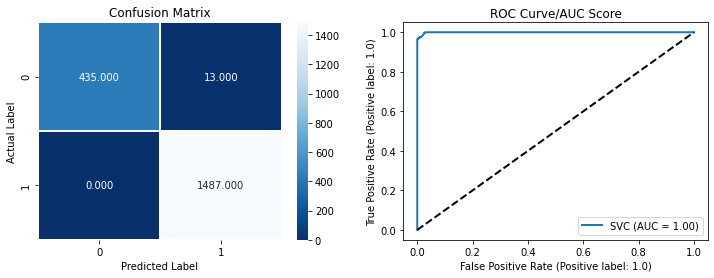



[*] Running basic model...

[*] Generating basic model with TTS for: SVC(C=1, gamma=1, probability=True)
-- Test Size:  0.4

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       1.00      0.97      0.98       593
         1.0       0.99      1.00      1.00      1987

    accuracy                           0.99      2580
   macro avg       1.00      0.98      0.99      2580
weighted avg       0.99      0.99      0.99      2580




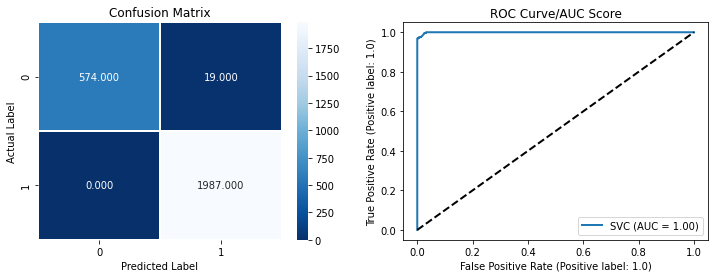



[*] Running cross-val model...

Cross Validation Model with Repeated Stratified K-Fold and SMOTE for: SVC(C=1, gamma=1, probability=True) 



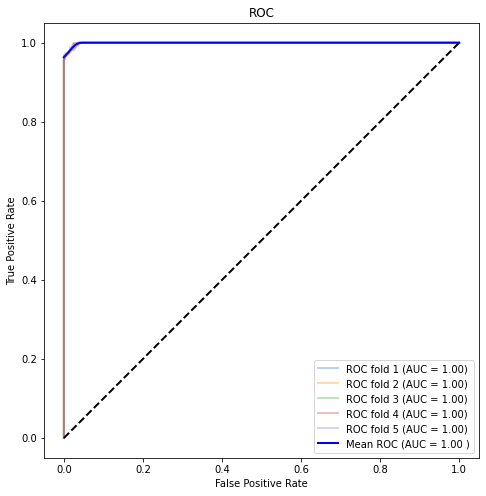


Scores for: SVC(C=1, gamma=1, probability=True)


,Accuracy,AUC,Precision,Recall,F1
0,0.989147,0.999304,0.985972,1.0,0.992936
1,0.989922,0.999309,0.986961,1.0,0.993438
2,0.991473,0.999364,0.988945,1.0,0.994442
3,0.992248,0.999470,0.989940,1.0,0.994944
4,0.993798,0.999457,0.991927,1.0,0.995947
mean,0.991318,0.999381,0.988749,1.0,0.994341



[*] Plotting ROC curve...


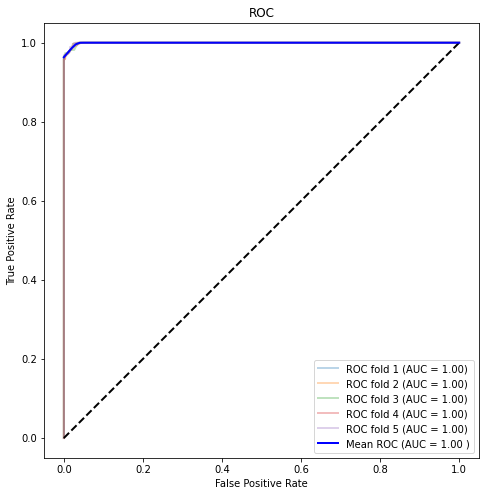


[*] Calculating model scores...


,Model 1 SMOTE
Accuracy,0.991318
AUC,0.999381
Precision,0.988749
Recall,1.000000
F1,0.994341


In [8]:
smote_model_scores = ModelFunctions.model_results_smote(clfs, X, y, cv)